<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Binary Prediction with a Rainfall Dataset


</h1>  
     
</div>

<p><center style="color:blue; font-family: 'Dancing Script'; font-size:30px;">🙏🏿Thanks for visiting my notebook 🕺🏿</center></p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The goal for this competition is to find Binary Prediction with a Rainfall Dataset.

**Evaluation**: Submissions are evaluated using the Area under ROC Cruve.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
    
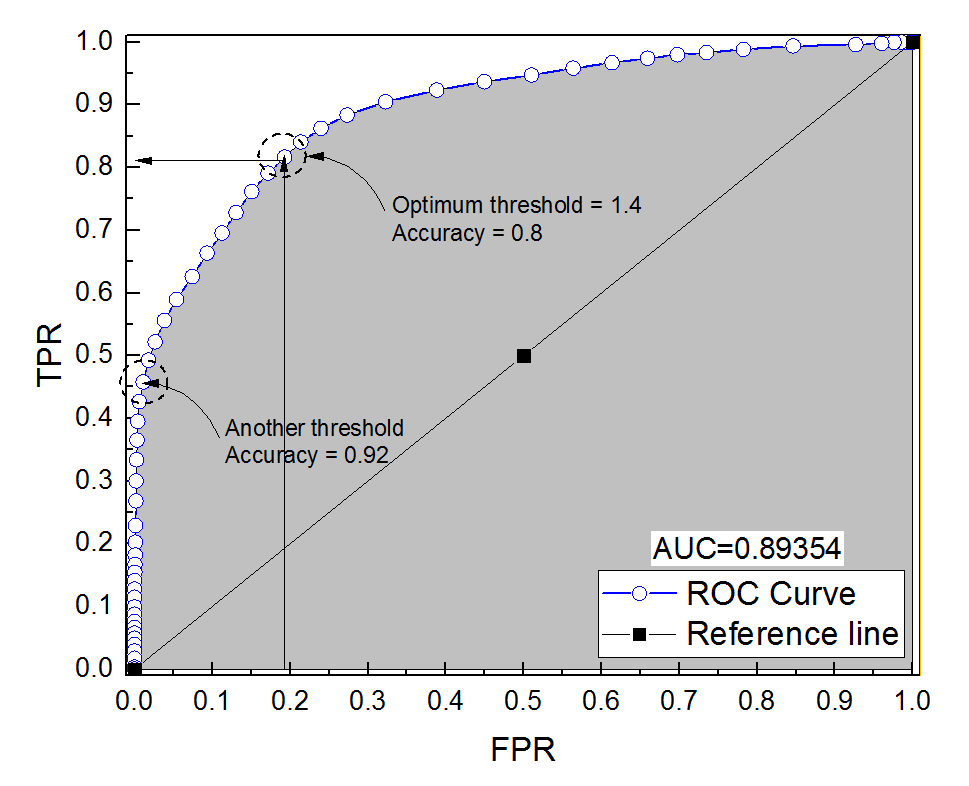




<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages   


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: u

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')

In [3]:
df_train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [4]:
df_train.shape

(2190, 13)

In [5]:
df_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [6]:
df_train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [7]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [8]:
df_sub.head()

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0


In [9]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [10]:
df_train.shape,df_test.shape

((2190, 12), (730, 11))

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 205.4 KB


In [12]:
df_train.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [13]:
df_test.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgreen; font-size:100%; text-align:left">

<h3 align="center"><font color='green'>💡 Summary from above :</font></h3>

1. Time Period: Data spans 2190 days (~6 years). 
1. Pressure: Ranges from 999 to 1034.6 hPa, with an average of 1013.6 hPa..
1. Temperature Metrics:Max: 10.4°C to 36°C (Avg: 26.37°C),Min: 4°C to 29.8°C (Avg: 22.17°C),Mean Temp: 7.4°C to 31.5°C (Avg: 23.95°C)
1. Dew Point: Varies from -0.3°C to 26.7°C (Avg: 20.45°C).Humidity: High overall, ranging from 39% to 98% (Avg: 82%).
1. Cloud Cover: 2% to 100% (Avg: 75.7%).Sunshine Hours: 0 to 12.1 hours per day (Avg: 3.74 hours).
1. Wind Direction: Highly variable, from 10° to 300° (Avg: 104.86°).Wind Speed: 4.4 km/h to 59.5 km/h (Avg: 21.8 km/h).
1. Rainfall: Mostly binary (0 or 1), indicating dry or rainy days (Avg: 0.75).There are no null and categorical datatype in dataset 

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚠🍜Exploratory Data Analysis♒🌊</h1>  
     
</div>

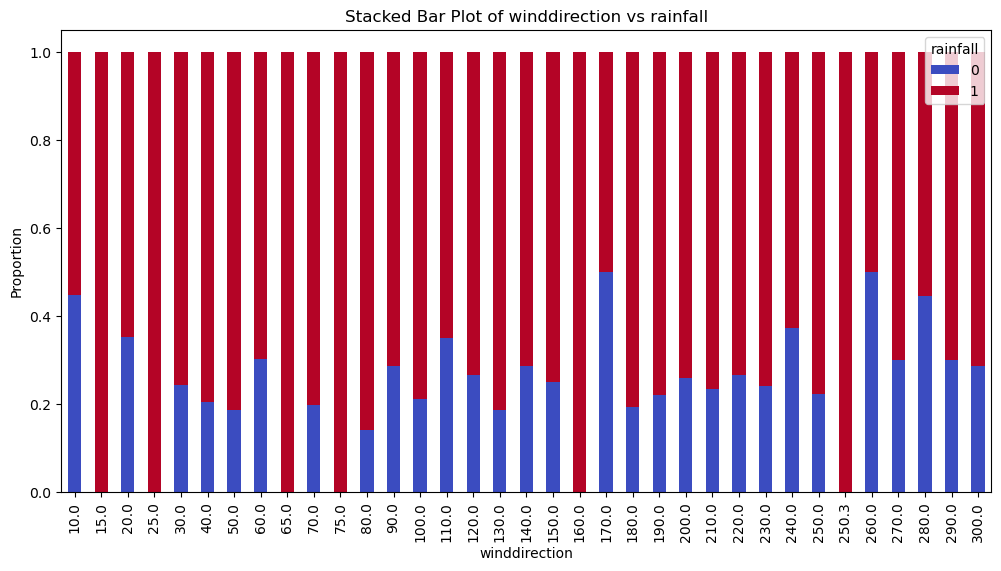

In [14]:
def stacked_bar_plot(df, feature, target='rainfall'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(df_train, 'winddirection')

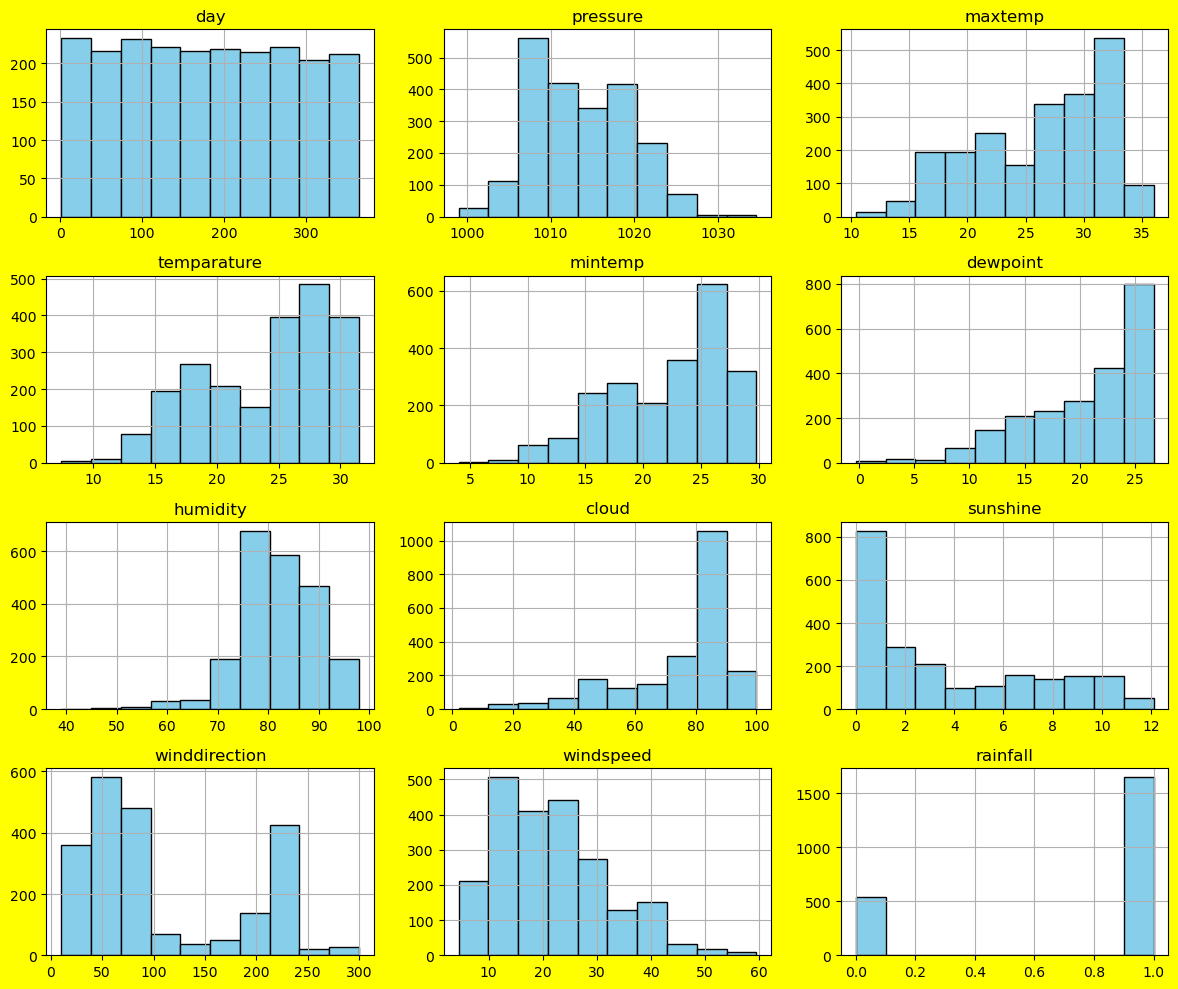

In [15]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

In [16]:
df_train.shape,df_test.shape

((2190, 12), (730, 11))

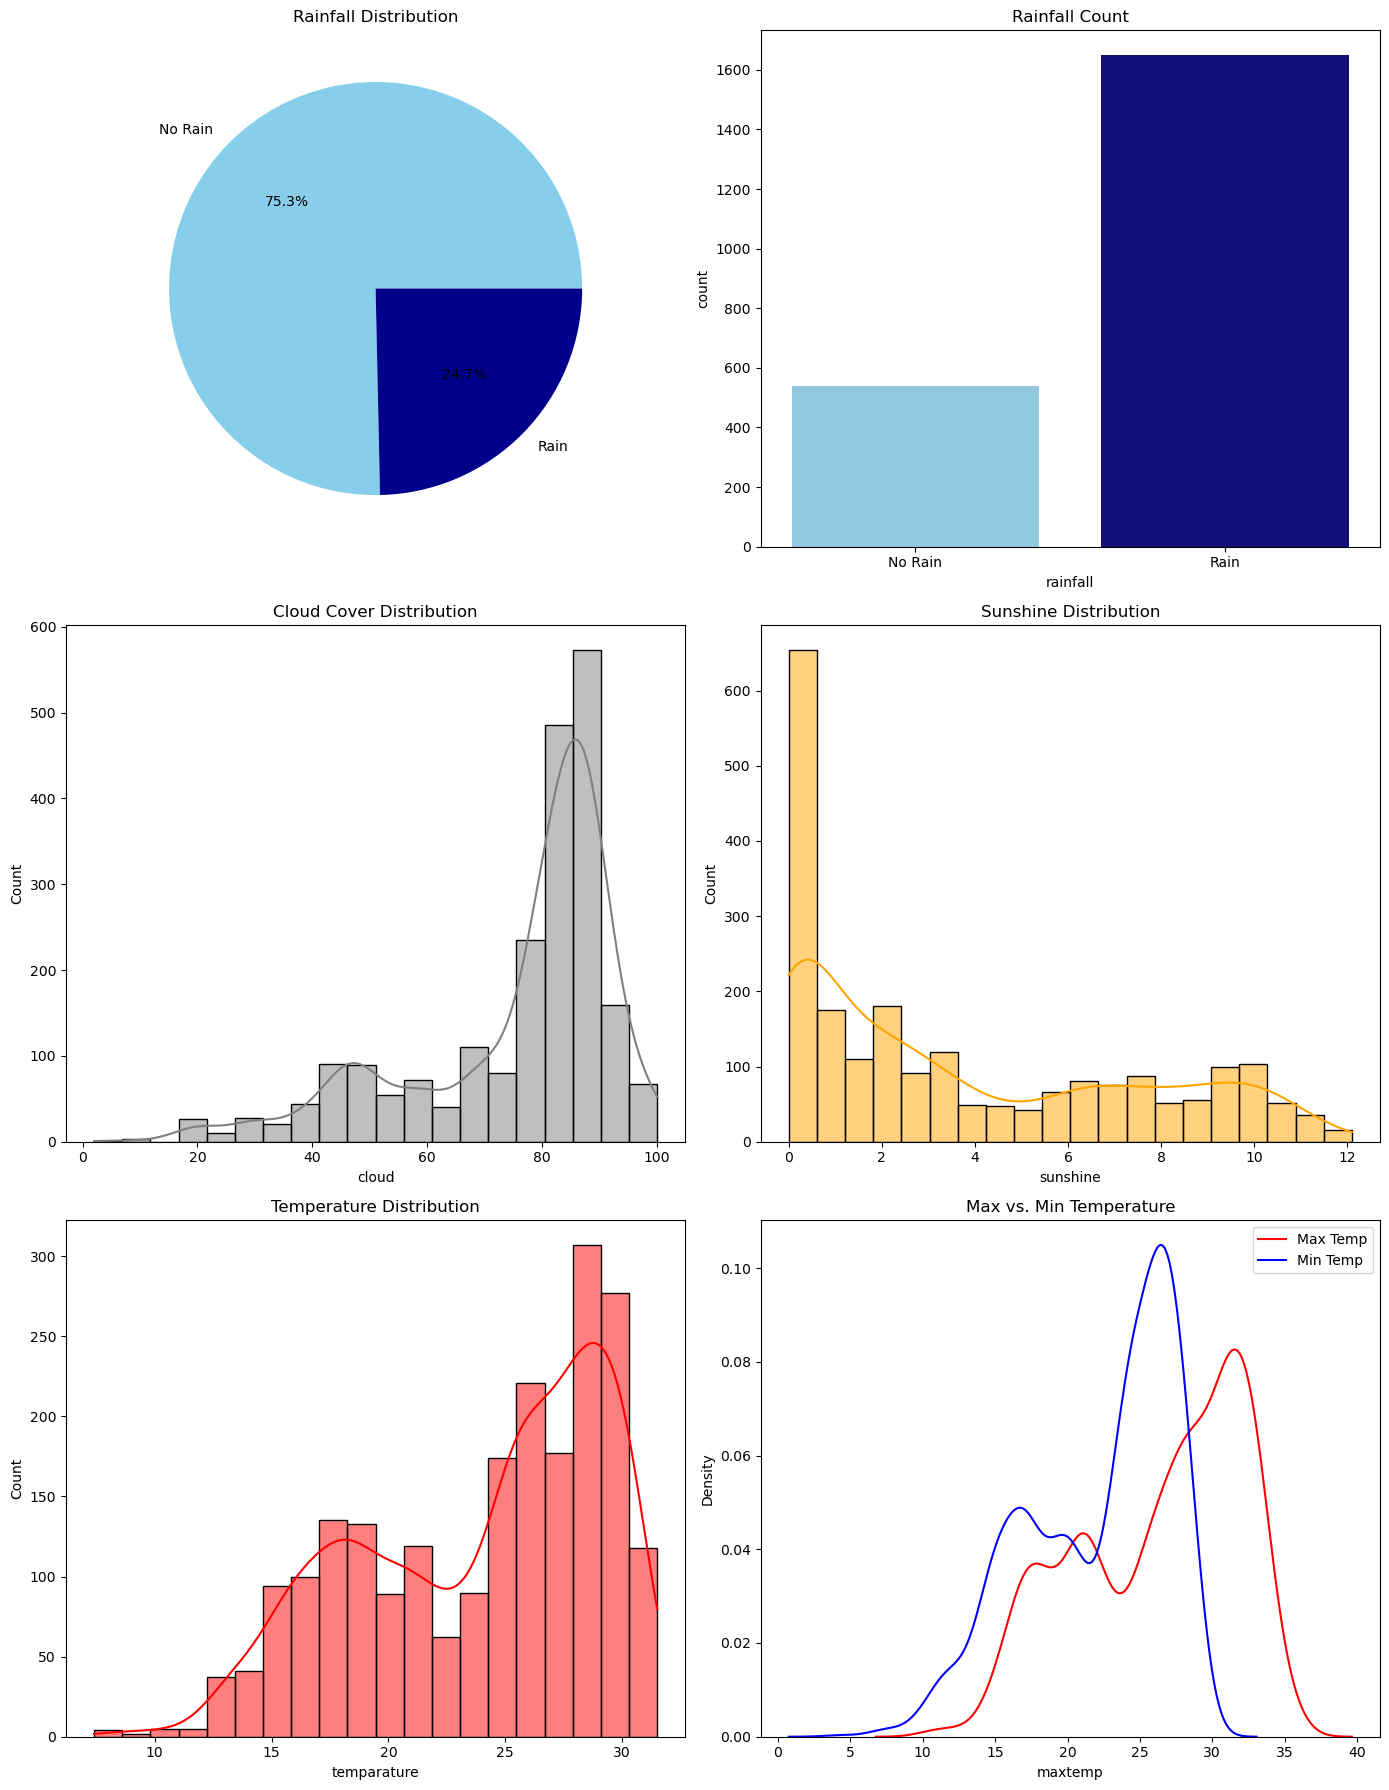

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

rain_counts = df_train['rainfall'].value_counts()
axes[0, 0].pie(rain_counts, labels=['No Rain', 'Rain'], autopct='%1.1f%%', colors=['skyblue', 'darkblue'])
axes[0, 0].set_title("Rainfall Distribution")

sns.countplot(x=df_train['rainfall'], ax=axes[0, 1], palette=['skyblue', 'darkblue'])
axes[0, 1].set_xticklabels(['No Rain', 'Rain'])
axes[0, 1].set_title("Rainfall Count")

sns.histplot(df_train['cloud'], bins=20, kde=True, ax=axes[1, 0], color="gray")
axes[1, 0].set_title("Cloud Cover Distribution")

sns.histplot(df_train['sunshine'], bins=20, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Sunshine Distribution")

sns.histplot(df_train['temparature'], bins=20, kde=True, ax=axes[2, 0], color="red")
axes[2, 0].set_title("Temperature Distribution")

sns.kdeplot(df_train['maxtemp'], label="Max Temp", color="red", ax=axes[2, 1])
sns.kdeplot(df_train['mintemp'], label="Min Temp", color="blue", ax=axes[2, 1])
axes[2, 1].legend()
axes[2, 1].set_title("Max vs. Min Temperature")

plt.tight_layout()
plt.show()

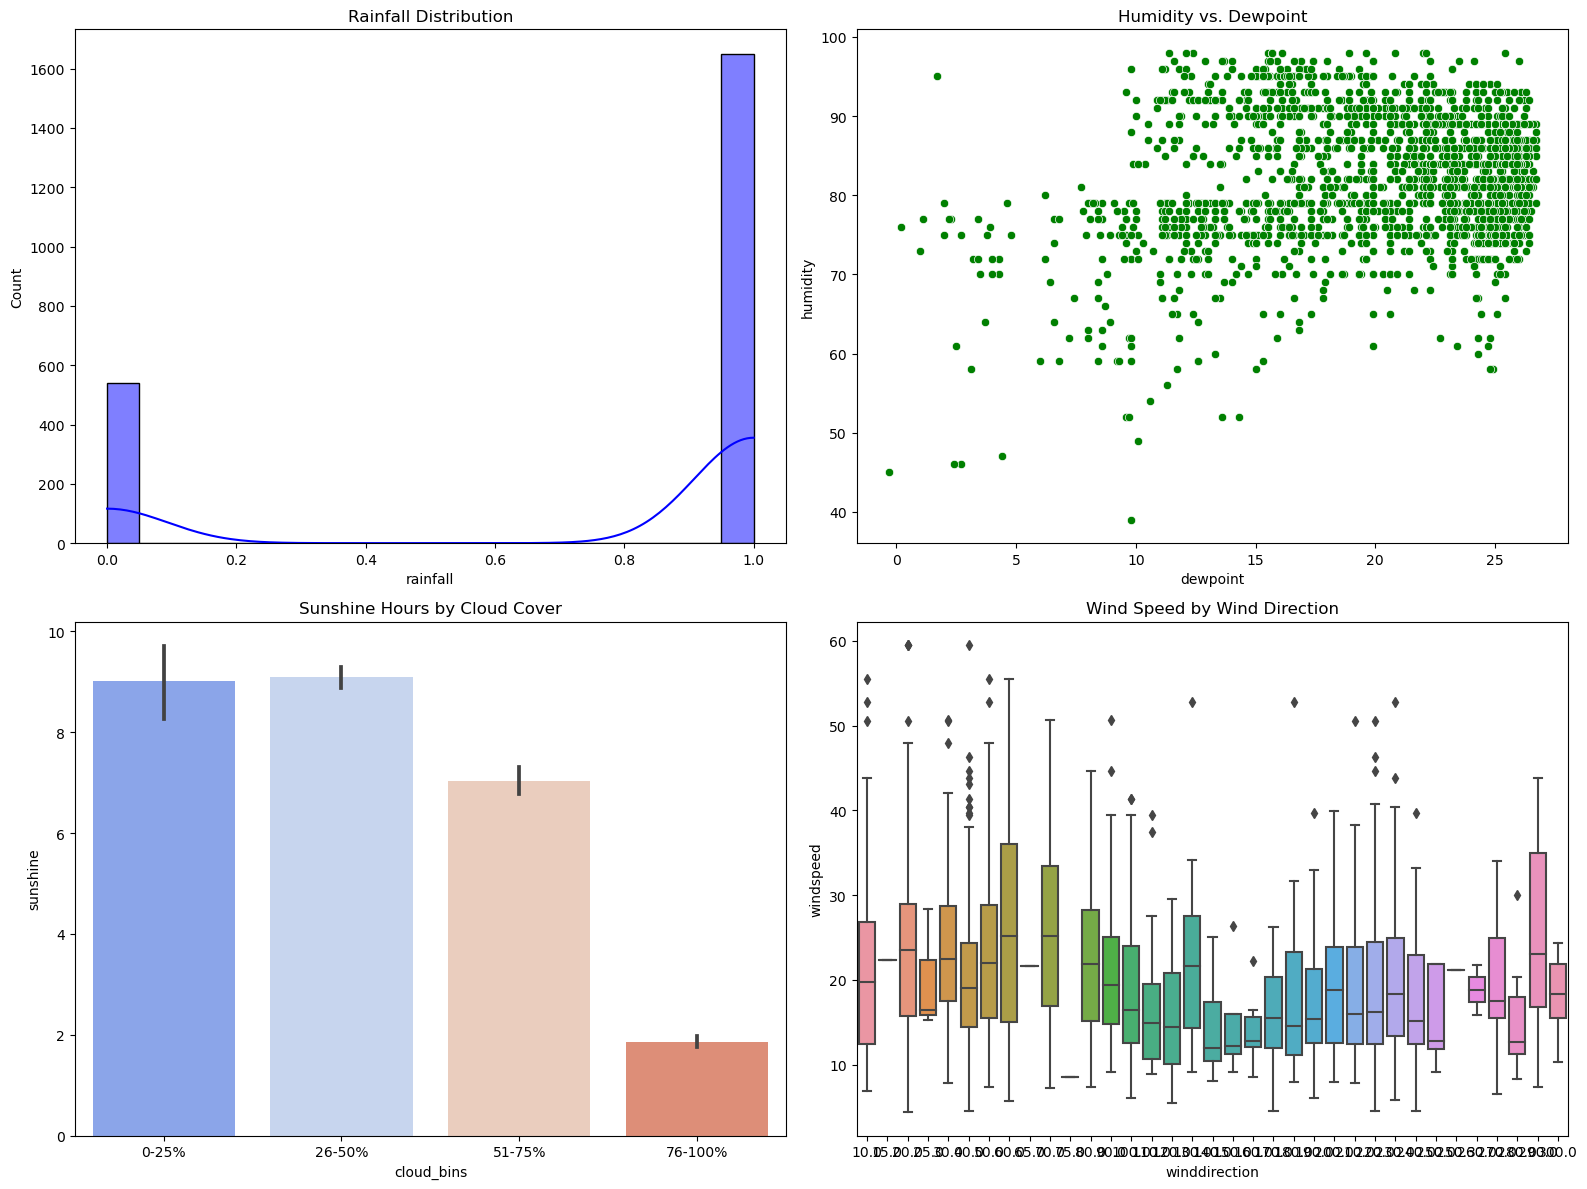

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(df_train['rainfall'], bins=20, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Rainfall Distribution")

sns.scatterplot(x=df_train['dewpoint'], y=df_train['humidity'], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Humidity vs. Dewpoint")

df_train['cloud_bins'] = pd.cut(df_train['cloud'], bins=[0, 25, 50, 75, 100], labels=["0-25%", "26-50%", "51-75%", "76-100%"])
sns.barplot(x=df_train['cloud_bins'], y=df_train['sunshine'], ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Sunshine Hours by Cloud Cover")

sns.boxplot(x=df_train['winddirection'], y=df_train['windspeed'], ax=axes[1, 1])
axes[1, 1].set_title("Wind Speed by Wind Direction")

plt.tight_layout()
plt.show()


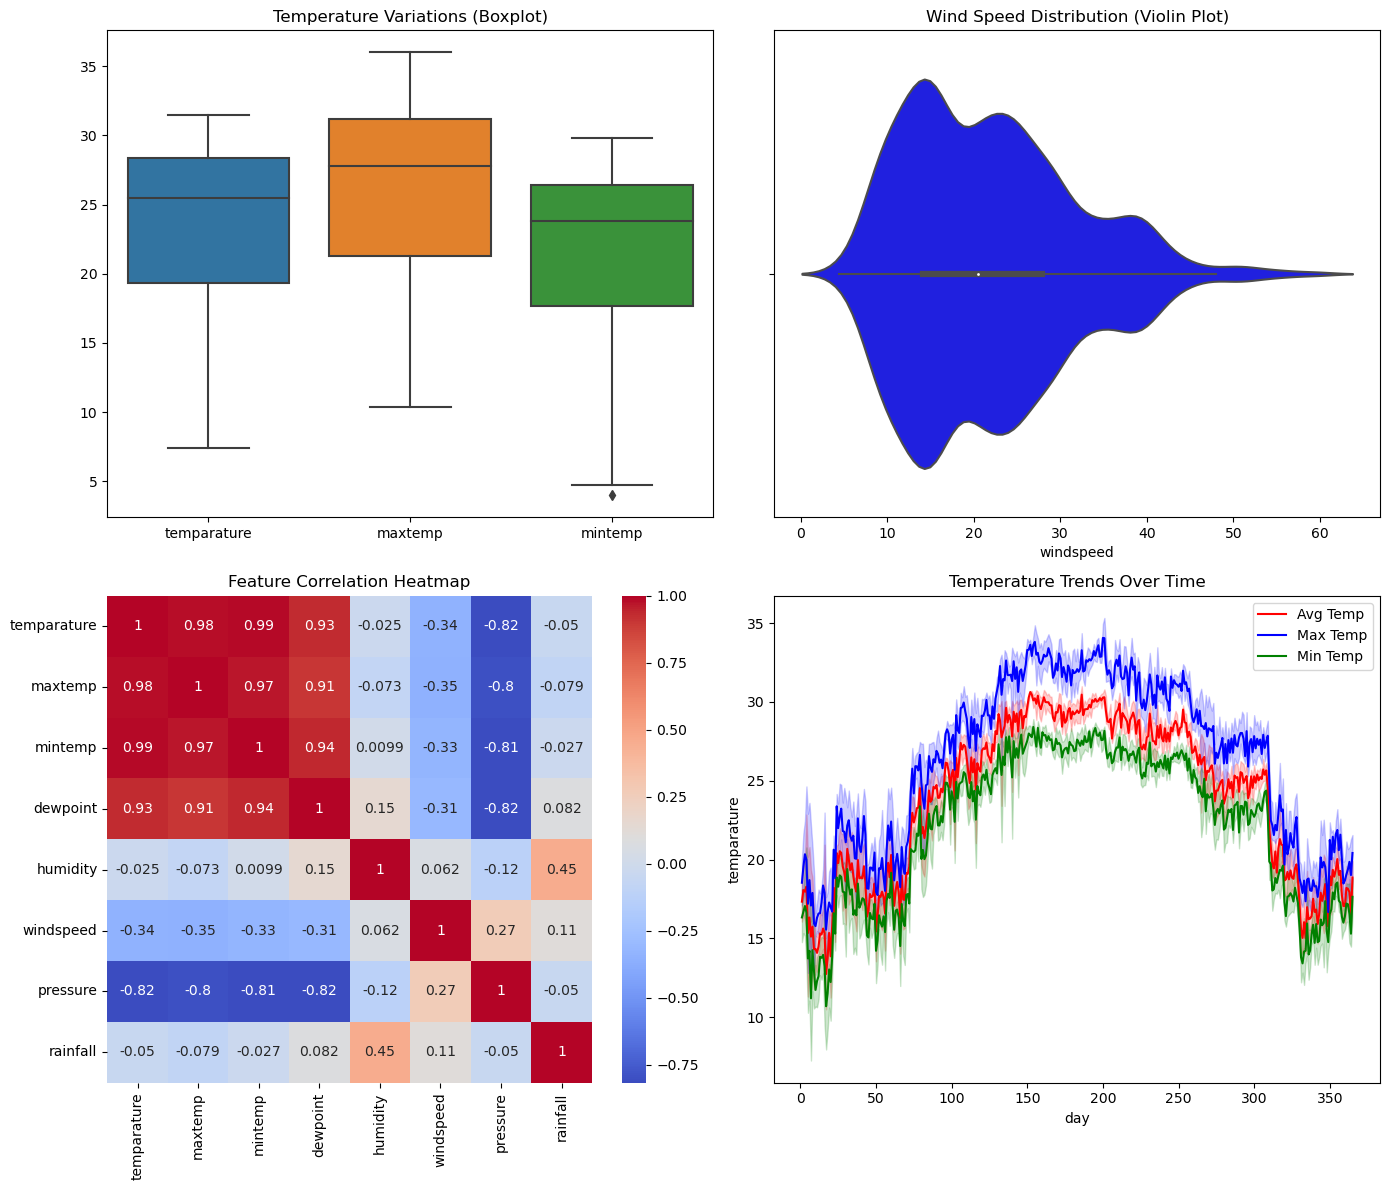

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.boxplot(data=df_train[['temparature', 'maxtemp', 'mintemp']], ax=axes[0, 0])
axes[0, 0].set_title("Temperature Variations (Boxplot)")

sns.violinplot(x=df_train['windspeed'], ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Wind Speed Distribution (Violin Plot)")

corr_matrix = df_train[['temparature', 'maxtemp', 'mintemp', 'dewpoint', 'humidity', 'windspeed', 'pressure', 'rainfall']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Feature Correlation Heatmap")

sns.lineplot(x='day', y='temparature', data=df_train, ax=axes[1, 1], label="Avg Temp", color='red')
sns.lineplot(x='day', y='maxtemp', data=df_train, ax=axes[1, 1], label="Max Temp", color='blue')
sns.lineplot(x='day', y='mintemp', data=df_train, ax=axes[1, 1], label="Min Temp", color='green')
axes[1, 1].set_title("Temperature Trends Over Time")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

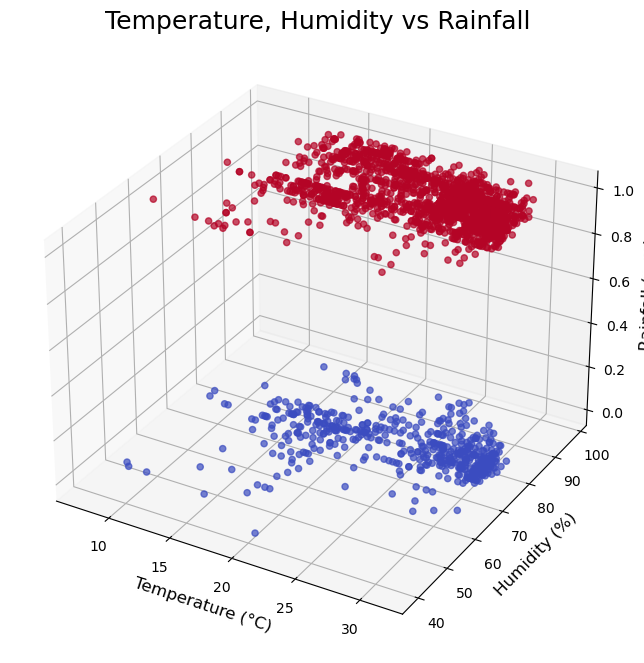

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_train['temparature'], df_train['humidity'], df_train['rainfall'], c=df_train['rainfall'], cmap='coolwarm', alpha=0.7)

# Labels
ax.set_xlabel('Temperature (°C)', fontsize=12)
ax.set_ylabel('Humidity (%)', fontsize=12)
ax.set_zlabel('Rainfall (mm)', fontsize=12)
ax.set_title('Temperature, Humidity vs Rainfall', fontsize=18)
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
    

    

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgreen; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 What We got from data, Lets have a look :</font></h3>

**Correlation Insights**:
Pressure & Temperature have a strong negative correlation (-0.80 to -0.82) → **Higher pressure is associated with lower temperatures.Max Temp, Avg Temp, Min Temp, and Dew Point are highly correlated (0.90 - 0.99)** 
→ Redundant information among these variables.
**Cloud Cover & Sunshine are strongly negatively correlated (-0.81) → More clouds mean less sunshine**.
Cloud Cover & Rainfall have a strong positive correlation (0.64) → More clouds generally lead to more rain.
**Wind Direction & Temperature (0.66 correlation) → Wind patterns significantly influence temperature.**
**Humidity & Cloud Cover (0.58 correlation)** → Higher humidity is associated with more cloud formation.
**Sunshine & Rainfall (-0.55 correlation) → More sunshine means less rainfall, which aligns with general weather patterns.**

**Multicollinearity Issues:**
**Severe multicollinearity exists among temperature-related features (MaxTemp, Temp, MinTemp, DewPoint) → May cause instability in regression models.**
Pressure’s strong negative correlation with temperature variables (-0.80+) suggests it might be redundant in models including temperature.


In [21]:
df_train = df_train.drop(columns=['cloud_bins'])

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [22]:
df_ext = pd.read_csv('/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv')
df_ext = df_ext.rename(columns={'pressure ': 'pressure', 'humidity ': 'humidity', 'cloud ': 'cloud','winddirection':'winddirection'})


In [23]:
df_train = pd.concat([df_train, df_ext], axis=0, ignore_index=True)


In [24]:
df_train = df_train[df_train.columns].replace({'yes': 1, 'no': 0})

Thanks to igor and muhammadqasimshabbir for  wonderfull work some features and catbboost code are brought from there **https://www.kaggle.com/code/igorvolianiuk/rainfall-prediction-eda-catboost-optuna/notebook**
https://www.kaggle.com/code/muhammadqasimshabbir/6thplacesolution-binarypredictionrainfall-872/notebook

In [25]:
def create_weather_features(df):    

    df["temp_Range"] = df["maxtemp"] - df["mintemp"]
    df["Heat_Index"] = df["temparature"] + 0.5 * (df["temparature"] - 10) * (df["humidity"] / 100)    
    df['csr'] = df['cloud'] / (df['sunshine'] + 1e-5)
    df["Dew_Dep"] = df["temparature"] - df["dewpoint"]    
    df["Wind_Chill"] = np.where(
        df["temparature"] < 10,
        13.12 + 0.6215 * df["temparature"] - 11.37 * df["windspeed"]**0.16 + 
       0.3965 * df["temparature"] * df["windspeed"]**0.16,
        df["temparature"]
    )   
    df['hsi'] = df['humidity'] * df['sunshine']
    df["Cloud_Sun_Ratio"] = df["cloud"] / (df["sunshine"] + 1)    
    df["Pressure_Change"] = df["pressure"].diff().fillna(0)    
    air_density = 1.225  
    df['wi'] = (0.4 * df['humidity']) + (0.3 * df['cloud']) - (0.3 * df['sunshine'])
    df["Wind_Power"] = 0.5 * air_density * df["windspeed"]**3         
    #df["Wind_Direction_Cat"] = pd.cut(df["winddirection"], 
                                      #bins=[0, 90, 180, 270, 360], 
                                     # labels=["North", "East", "South", "West"], 
                                      #include_lowest=True)

    df['cloud + humidity'] = df.cloud + df.humidity
    df['cloud + humidity + sunshine'] = df.cloud + df.humidity + df.sunshine
    df['sp'] = df['sunshine'] / (df['sunshine'] + df['cloud'] + 1e-5)
    df['cloud * sunshine'] = df.cloud * df.sunshine
    df['humidity * sunshine'] = df.humidity * df.sunshine
    df['rd'] = 100 - df['humidity']
    df["HTI"] = df["temparature"] + 0.2 * df["humidity"]    
    df["ACI"] = (df["maxtemp"] + df["mintemp"]) / 2 - (df["humidity"] / 2) + df["dewpoint"]    
    df["CSI"] = (df["sunshine"] - df["cloud"]) / (df["sunshine"] + df["cloud"] + 1)  
    df['hci'] = df['humidity'] * df['cloud']
    df["WCI"] = df["temparature"] - 0.5 * df["windspeed"]
    df['day'] = pd.to_datetime(df['day'], errors='coerce')    
   
    
    return df
    

In [26]:
df_train = create_weather_features(df_train)
df_test = create_weather_features(df_test)

In [27]:
df_test.fillna(df_test.median(), inplace=True)
df_train.fillna(df_train.median(), inplace=True)

/tmp/ipykernel_20/1101998587.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_test.fillna(df_test.median(), inplace=True)
/tmp/ipykernel_20/1101998587.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_train.fillna(df_train.median(), inplace=True)


In [28]:
df_train = df_train.drop(columns=['day','         winddirection'])
df_test = df_test.drop(columns=['day'])

In [29]:
y = df_train['rainfall'] 
df_train = df_train.drop(['rainfall'],axis=1)
X = df_train

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Algorithm Which requires Scaling♒🌊</h1>  
     
</div>

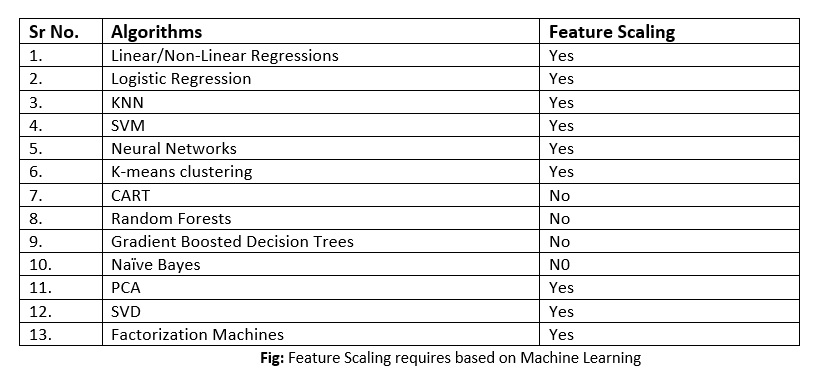

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [31]:
df_train.shape

(2556, 31)

In [32]:
X.shape

(2556, 31)

In [33]:
scaled_test_data.shape

(730, 31)

In [34]:
X.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'temp_Range',
       'Heat_Index', 'csr', 'Dew_Dep', 'Wind_Chill', 'hsi', 'Cloud_Sun_Ratio',
       'Pressure_Change', 'wi', 'Wind_Power', 'cloud + humidity',
       'cloud + humidity + sunshine', 'sp', 'cloud * sunshine',
       'humidity * sunshine', 'rd', 'HTI', 'ACI', 'CSI', 'hci', 'WCI'],
      dtype='object')

In [35]:
scaled_test_data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'temp_Range',
       'Heat_Index', 'csr', 'Dew_Dep', 'Wind_Chill', 'hsi', 'Cloud_Sun_Ratio',
       'Pressure_Change', 'wi', 'Wind_Power', 'cloud + humidity',
       'cloud + humidity + sunshine', 'sp', 'cloud * sunshine',
       'humidity * sunshine', 'rd', 'HTI', 'ACI', 'CSI', 'hci', 'WCI'],
      dtype='object')

In [36]:
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(scaled_test_data)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [37]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [38]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[AUC(name='auc')])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-5, verbose=1)

In [39]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
64/64 [==============================] - 3s 13ms/step - loss: 0.6722 - auc: 0.5462 - val_loss: 0.6199 - val_auc: 0.7019 - lr: 1.0000e-04
Epoch 2/200
64/64 [==============================] - 0s 8ms/step - loss: 0.5807 - auc: 0.6213 - val_loss: 0.5295 - val_auc: 0.8021 - lr: 1.0000e-04
Epoch 3/200
64/64 [==============================] - 0s 8ms/step - loss: 0.5159 - auc: 0.7396 - val_loss: 0.4680 - val_auc: 0.8438 - lr: 1.0000e-04
Epoch 4/200
64/64 [==============================] - 0s 8ms/step - loss: 0.4635 - auc: 0.8101 - val_loss: 0.4162 - val_auc: 0.8605 - lr: 1.0000e-04
Epoch 5/200
64/64 [==============================] - 0s 8ms/step - loss: 0.4259 - auc: 0.8381 - val_loss: 0.3881 - val_auc: 0.8684 - lr: 1.0000e-04
Epoch 6/200
64/64 [==============================] - 0s 7ms/step - loss: 0.4031 - auc: 0.8521 - val_loss: 0.3726 - val_auc: 0.8746 - lr: 1.0000e-04
Epoch 7/200
64/64 [==============================] - 0s 7ms/step - loss: 0.3932 - auc: 0.8583 - val_loss: 0.364

Available metrics: ['loss', 'auc', 'val_loss', 'val_auc', 'lr']


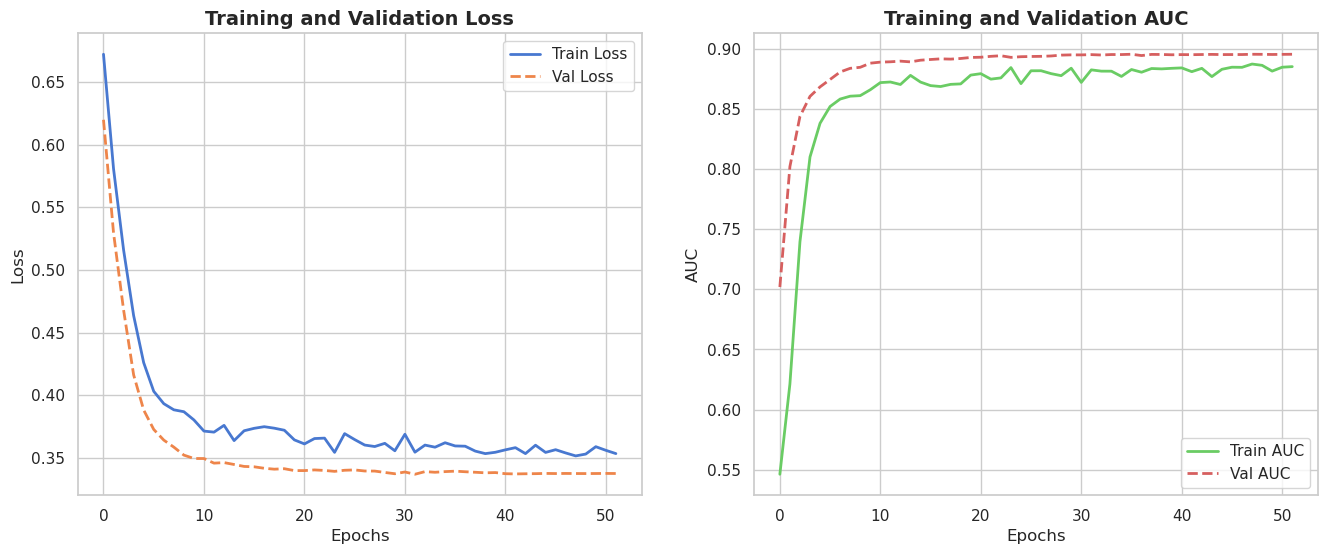

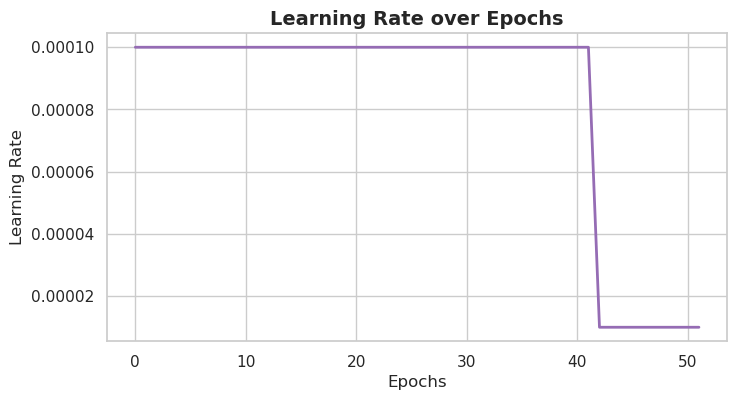

<Figure size 640x480 with 0 Axes>

In [40]:
sns.set(style="whitegrid")

history_dict = history.history
metrics = list(history_dict.keys())
print("Available metrics:", metrics)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("muted")

axes[0].plot(history_dict['loss'], label='Train Loss', color=colors[0], linewidth=2)
axes[0].plot(history_dict['val_loss'], label='Val Loss', color=colors[1], linestyle='--', linewidth=2)
axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend()
axes[0].grid(True)

if 'auc' in metrics and 'val_auc' in metrics:
    axes[1].plot(history_dict['auc'], label='Train AUC', color=colors[2], linewidth=2)
    axes[1].plot(history_dict['val_auc'], label='Val AUC', color=colors[3], linestyle='--', linewidth=2)
    axes[1].set_title('Training and Validation AUC', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('AUC', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)
    
if 'lr' in metrics:
    fig, ax_lr = plt.subplots(figsize=(8, 4))
    ax_lr.plot(history_dict['lr'], color=colors[4], linewidth=2)
    ax_lr.set_title('Learning Rate over Epochs', fontsize=14, fontweight='bold')
    ax_lr.set_xlabel('Epochs', fontsize=12)
    ax_lr.set_ylabel('Learning Rate', fontsize=12)
    plt.grid(True)
    plt.show()

if 'epoch_time' in metrics:
    fig, ax_time = plt.subplots(figsize=(8, 4))
    ax_time.plot(history_dict['epoch_time'], color=colors[5], linewidth=2)
    ax_time.set_title('Epoch Time over Epochs', fontsize=14, fontweight='bold')
    ax_time.set_xlabel('Epochs', fontsize=12)
    ax_time.set_ylabel('Time (seconds)', fontsize=12)
    plt.grid(True)
    plt.show()

plt.tight_layout()
plt.show()


In [41]:
lgb_params = {'max_depth': 11, 
              'num_leaves': 152, 
              'learning_rate': 0.1284552398987031,
                'feature_fraction': 0.699205159877181965, 
              'bagging_fraction': 0.964565149953761379, 
                'bagging_freq': 3, 
              'min_child_samples': 93, 
              'lambda_l1': 1.4313376954414664e-09, 
                'lambda_l2': 5.9890062038048195, 
                'min_gain_to_split': 0.5655566115584013}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]    
   
    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc',
                   #early_stopping_rounds=10,
                   #verbose=False
                  )    

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]   
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val    
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits
overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)

[LightGBM] [Warning] lambda_l1 is set=1.4313376954414664e-09, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4313376954414664e-09
[LightGBM] [Warning] bagging_fraction is set=0.9645651499537614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9645651499537614
[LightGBM] [Warning] min_gain_to_split is set=0.5655566115584013, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5655566115584013
[LightGBM] [Warning] lambda_l2 is set=5.989006203804819, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.989006203804819
[LightGBM] [Warning] feature_fraction is set=0.699205159877182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.699205159877182
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's auc: 0.848575	valid_0's binary_logloss: 0.523394
[2]	valid_0's auc: 0.860686	valid_0's binary_logloss: 0.490826
[3]	valid_0's auc: 0.863387	valid_0's bi

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for lightgbm♒🌊</h1>  
     
</div>

In [42]:

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  
    label_encoders[col] = le  

cat_features = [X.columns.get_loc(col) for col in categorical_columns]
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=41)
accuracy_list = []
f1_list = []
roc_auc_list = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nTraining Fold {fold}/{n_splits}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        cat_features=cat_features, 
        verbose=200,
        early_stopping_rounds=10
    )
 
    catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=200)
    y_pred = catboost_model.predict(X_val)
    y_pred_proba = catboost_model.predict_proba(X_val)[:, 1]
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    print(f"Fold {fold} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"Mean F1-Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_list):.4f} ± {np.std(roc_auc_list):.4f}")


Training Fold 1/5
0:	learn: 0.6140482	test: 0.6186186	best: 0.6186186 (0)	total: 63.5ms	remaining: 1m 3s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3543340683
bestIteration = 47

Shrink model to first 48 iterations.
Fold 1 - Accuracy: 0.8594, F1-Score: 0.8571, ROC-AUC: 0.8851

Training Fold 2/5
0:	learn: 0.6116952	test: 0.6158227	best: 0.6158227 (0)	total: 7.72ms	remaining: 7.71s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3627710492
bestIteration = 37

Shrink model to first 38 iterations.
Fold 2 - Accuracy: 0.8474, F1-Score: 0.8435, ROC-AUC: 0.8828

Training Fold 3/5
0:	learn: 0.6126613	test: 0.6146148	best: 0.6146148 (0)	total: 6.58ms	remaining: 6.57s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3599526083
bestIteration = 36

Shrink model to first 37 iterations.
Fold 3 - Accuracy: 0.8611, F1-Score: 0.8578, ROC-AUC: 0.8808

Training Fold 4/5
0:	learn: 0.6123234	test: 0.6097104	best: 0.6097104 (0)	total: 5.73ms	re

In [43]:
cat_pred = catboost_model.predict_proba(scaled_test_data)[:, 1]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

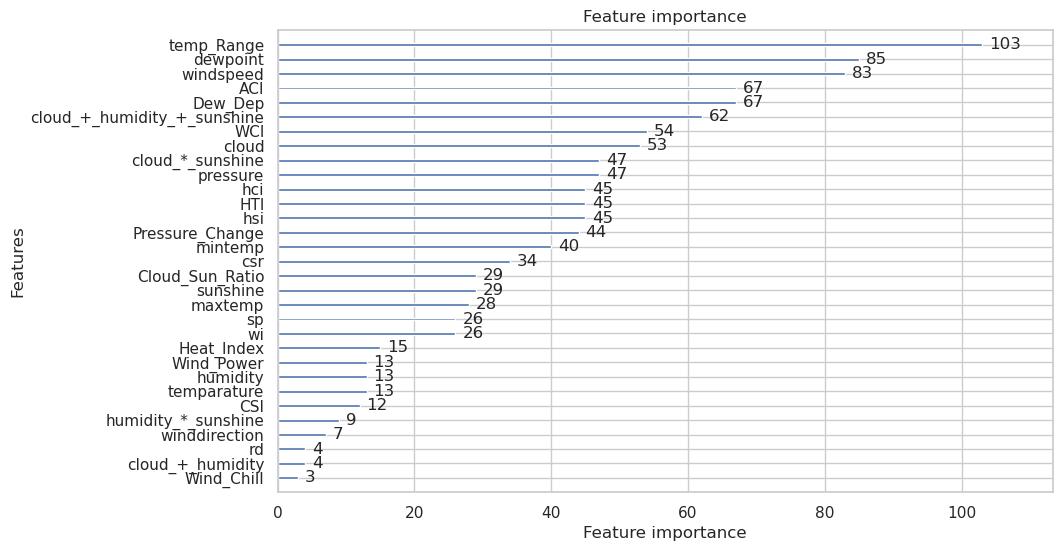

In [44]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

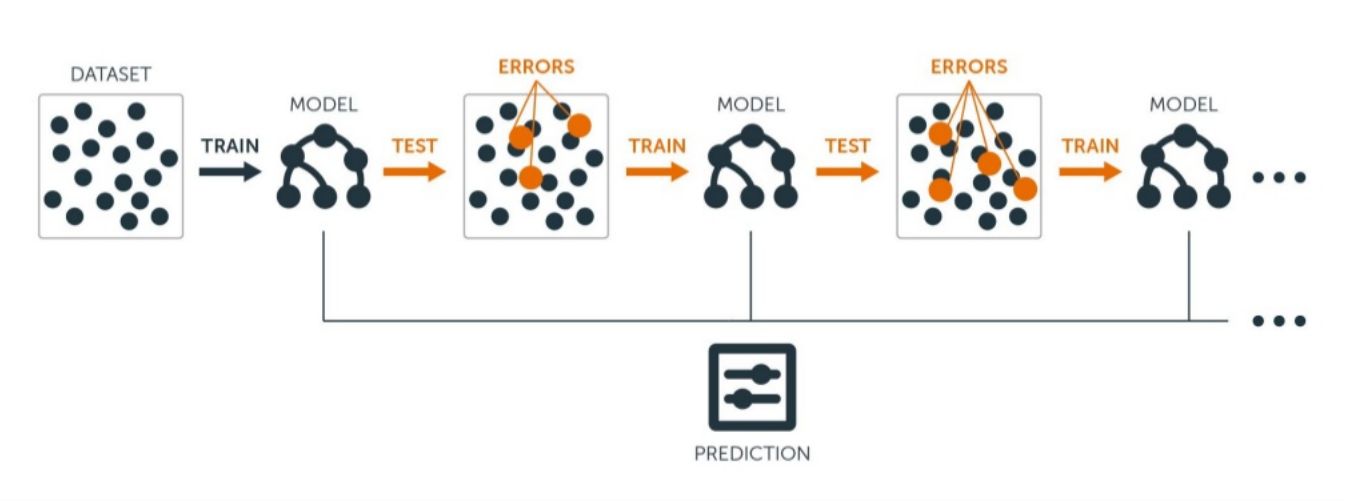

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚒🌊How well The prediction fit♒🌊</h1>  
     
</div>

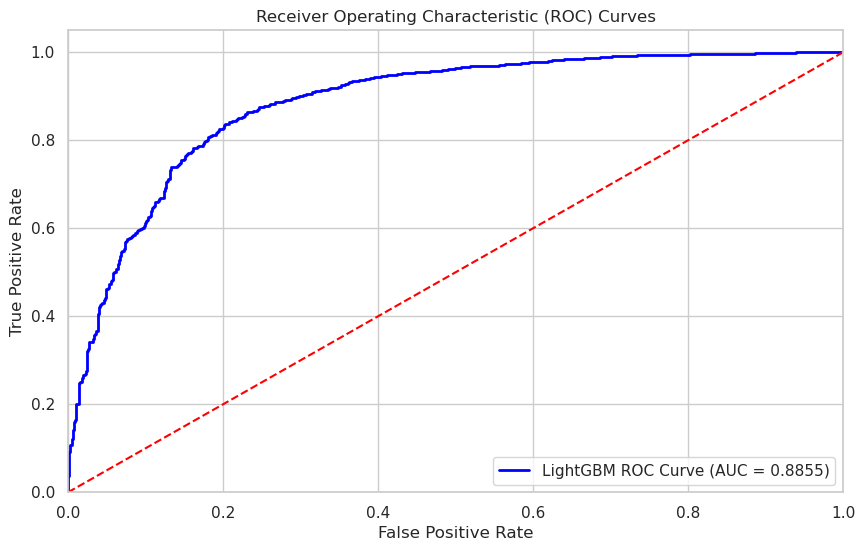

In [45]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(lgbm_true_labels, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

#fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
#roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
#plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [46]:
test_preds = model.predict(X_test_scaled).flatten()

if np.isnan(test_preds).sum() > 0:
    print(f"Found {np.isnan(test_preds).sum()} NaN values in predictions. Fixing them...")
    test_preds = np.nan_to_num(test_preds) 

23/23 [==============================] - 0s 2ms/step


In [47]:
df_sub['rainfall'] =(lgbm_test_predictions+cat_pred)*0.5/200+test_preds

In [48]:
df_sub

,id,rainfall
0,2190,0.988709
1,2191,0.995403
2,2192,0.982721
3,2193,0.133208
4,2194,0.104913
...,...,...
725,2915,0.987419
726,2916,0.814480
727,2917,0.979062
728,2918,0.993744


In [49]:
df_sub['rainfall'][15]=-1
df_sub['rainfall'][25]=-1
df_sub['rainfall'][29]=2
df_sub['rainfall'][120]=-1
df_sub['rainfall'][123]=2
df_sub['rainfall'][125]=2
df_sub['rainfall'][2]=2
df_sub['rainfall'][39]=2
df_sub['rainfall'][112]=-2
df_sub['rainfall'][87]=-2
df_sub['rainfall'][118]=+2
df_sub['rainfall'][58]=+2
df_sub['rainfall'][71]=2
df_sub['rainfall'][90]=+2
idx = [  0,   1,   7,  10,  12,  13,  23,  27,  29,  33,  47,  50,  51,
         52,  53,  54,  55,  59,  61,  62,  70,  74,  77,  79,  84,  85,
         88,  95,  96, 100, 103, 108, 113, 123, 125, 126, 127, 128, 134,
        135, 136, 137, 138, 139, 140, 144, 145]
df_sub['rainfall'][idx]=2

/tmp/ipykernel_20/2649017173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['rainfall'][15]=-1
/tmp/ipykernel_20/2649017173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['rainfall'][25]=-1
/tmp/ipykernel_20/2649017173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['rainfall'][29]=2
/tmp/ipykernel_20/2649017173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [50]:
df_sub.to_csv('submission.csv', index=False)

In [51]:
df_sub.head()

,id,rainfall
0,2190,2.000000
1,2191,2.000000
2,2192,2.000000
3,2193,0.133208
4,2194,0.104913


<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Looking Forward for feeback </h1>  
     
</div>

<a id="1.4"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b>  Refrences</b></div>

# Thanks to samanyuk for neural model https://www.kaggle.com/code/samanyuk/rainfall-prediction-ps-s5-e3-0-89541
